In [757]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pd.set_option('display.float_format', lambda x: '%.5f' % x)
# pd.options.display.float_format = '{:,.2f}'.format

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:,.2f}'.format

In [758]:
df = pd.read_stata("/users/quasar/downloads/Dataset/Master_thesis_data/JEDC_dataset/10SD_jan15.dta")
df.set_index('Year', 'Country')

/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_1521/1155108636.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only
  df.set_index('Year', 'Country')


,Country,Regioncode,Region,Variable,AGR,MIN,MAN,PU,CON,WRT,TRA,FIRE,GOV,OTH,SUM
Year,,,,,,,,,,,,,,,
1960,BWA,SSA,Sub-saharan Africa,VA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,BWA,SSA,Sub-saharan Africa,VA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,BWA,SSA,Sub-saharan Africa,VA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,BWA,SSA,Sub-saharan Africa,VA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,BWA,SSA,Sub-saharan Africa,VA,16.30,3.49,0.74,0.10,0.66,6.24,1.66,1.12,4.82,2.34,37.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,EGY,MENA,Middle East and North Africa,EMP,"5,225.14",31.98,"2,500.13",289.87,"2,376.25","2,814.70","1,806.55",749.22,"5,246.05",NaN,"21,039.90"
2009,EGY,MENA,Middle East and North Africa,EMP,"5,218.60",30.56,"2,541.43",301.08,"2,662.40","3,012.24","1,898.16",784.55,"5,414.84",NaN,"21,863.86"
2010,EGY,MENA,Middle East and North Africa,EMP,"5,205.53",29.00,"2,435.55",307.27,"2,732.95","2,977.06","1,992.27",801.30,"5,538.95",NaN,"22,019.88"


In [759]:
df.Country.unique()

array(['BWA', 'ETH', 'GHA', 'KEN', 'MWI', 'MUS', 'NGA', 'NGA(alt)', 'SEN',
       'ZAF', 'TZA', 'ZMB', 'CHN', 'HKG', 'IND', 'IDN', 'JPN', 'KOR',
       'MYS', 'PHL', 'SGP', 'TWN', 'THA', 'ARG', 'BOL', 'BRA', 'CHL',
       'COL', 'CRI', 'MEX', 'PER', 'VEN', 'USA', 'DEW', 'DNK', 'ESP',
       'FRA', 'GBR', 'ITA', 'NLD', 'SWE', 'MOR', 'EGY'], dtype=object)

calibrate benchmark to U.S.data for the economy period from 1956 to 2004

In [760]:
US = df.loc[(df.Country == 'USA') & (df.Year >= 1956) & (df.Year <= 2010)]

In [761]:
US

,Country,Regioncode,Region,Variable,Year,AGR,MIN,MAN,PU,CON,WRT,TRA,FIRE,GOV,OTH,SUM
5470,USA,NAM,North America,VA,1956,"18,287.05","11,542.08","115,220.67","9,487.89","18,804.86","83,710.95","31,814.63","77,484.53","68,149.55","8,685.82","443,188.02"
5471,USA,NAM,North America,VA,1957,"18,198.81","11,647.86","119,373.06","9,911.03","20,160.25","87,958.95","33,300.42","83,214.38","72,856.68","9,384.05","466,005.48"
5472,USA,NAM,North America,VA,1958,"20,303.46","10,742.89","112,620.79","9,740.70","21,603.83","89,535.11","32,687.37","89,864.19","77,496.24","9,896.34","474,490.92"
5473,USA,NAM,North America,VA,1959,"18,890.76","10,595.14","126,807.62","10,566.80","23,871.76","99,869.78","34,923.50","96,925.18","81,744.17","10,857.89","515,052.62"
5474,USA,NAM,North America,VA,1960,"19,829.78","10,876.37","128,808.36","10,806.16","26,105.18","103,229.52","36,082.55","103,981.73","86,946.79","11,569.58","538,236.02"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649,USA,NAM,North America,EMP,2006,"2,225.66",674.01,"15,351.12",545.16,"9,653.31","36,380.59","6,760.43","27,769.30","42,516.67","9,443.14","151,319.39"
5650,USA,NAM,North America,EMP,2007,"2,122.79",730.46,"15,057.00",548.14,"9,577.27","36,839.70","6,783.48","28,092.69","43,170.56","9,645.07","152,567.15"
5651,USA,NAM,North America,EMP,2008,"2,108.26",783.81,"14,525.15",556.10,"9,059.47","36,524.57","6,815.25","27,608.11","43,988.37","9,773.69","151,742.79"
5652,USA,NAM,North America,EMP,2009,"2,061.82",709.07,"12,897.93",559.09,"7,767.07","34,858.29","6,578.14","25,982.43","44,450.82","9,480.17","145,344.83"


In [762]:
US_emp = US.loc[US.Variable == 'EMP']
US_VA = US.loc[US.Variable == 'VA']

In [763]:
US_emp['agri'] = US_emp.AGR
US_emp['manufacturing'] = US_emp.MIN + US_emp.MAN
US_emp['service'] = US_emp.PU + US_emp.CON + US_emp.WRT + US_emp.TRA + US_emp.FIRE + US_emp.GOV + US_emp.OTH
US_emp['agri_share'] = US_emp.AGR / US_emp.SUM
US_emp['manu_share'] = US_emp.manufacturing / US_emp.SUM
US_emp['service_share'] = US_emp.service / US_emp.SUM
US_emp = US_emp.set_index('Year')

/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_1521/2491914542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_emp['agri'] = US_emp.AGR
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_1521/2491914542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_emp['manufacturing'] = US_emp.MIN + US_emp.MAN
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_1521/2491914542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [764]:
US_VA['agri'] = US_VA.AGR
US_VA['manufacturing'] = US_VA.MIN + US_VA.MAN
US_VA['service'] = US_VA.PU + US_VA.CON + US_VA.WRT + US_VA.TRA + US_VA.FIRE + US_VA.GOV + US_VA.OTH
US_VA['agri_share'] = US_VA.AGR / US_VA.SUM
US_VA['manu_share'] = US_VA.manufacturing / US_VA.SUM
US_VA['service_share'] = US_VA.service / US_VA.SUM
US_VA = US_VA.set_index('Year')

/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_1521/2089476001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_VA['agri'] = US_VA.AGR
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_1521/2089476001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_VA['manufacturing'] = US_VA.MIN + US_VA.MAN
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_1521/2089476001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

<AxesSubplot:title={'center':'Sectoral Employment share'}, xlabel='Year'>

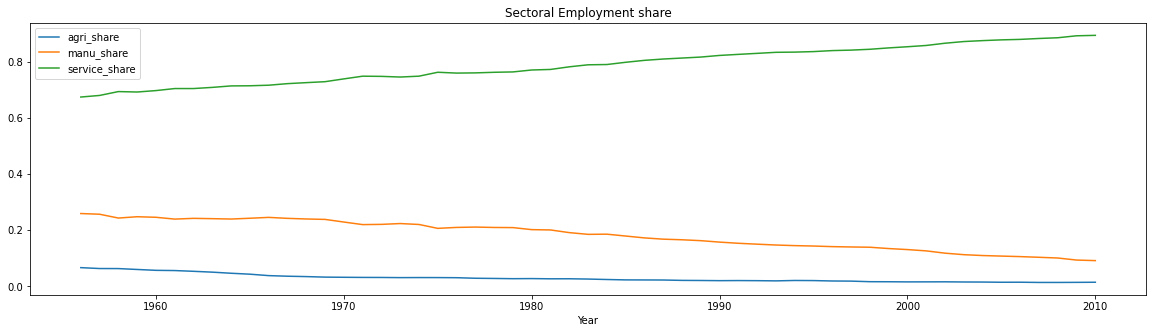

In [765]:
US_emp[['agri_share', 'manu_share', 'service_share']].plot(figsize = (20, 5), title = 'Sectoral Employment share')

<AxesSubplot:title={'center':'Sectoral Value added share'}, xlabel='Year'>

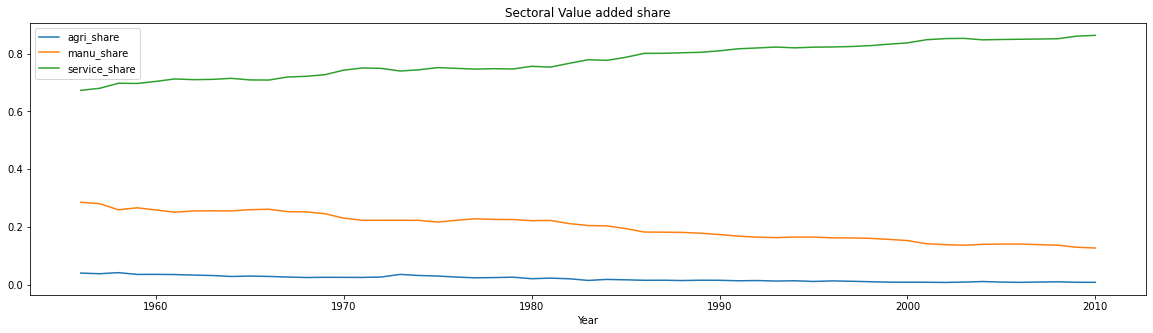

In [766]:
US_VA[['agri_share', 'manu_share', 'service_share']].plot(figsize = (20, 5), title = 'Sectoral Value added share')

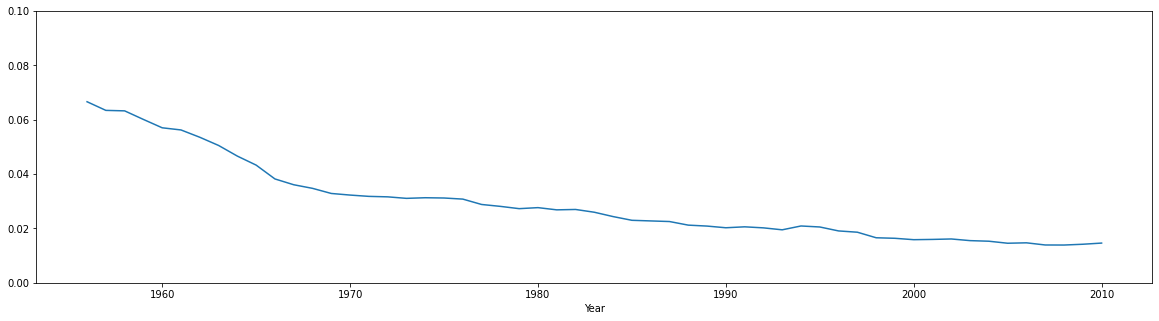

In [767]:
US_emp['agri_share'].plot(figsize = (20, 5))
plt.ylim(0, 0.1)
plt.show()

In [768]:
print(US_emp['agri_share'][1960], US_emp['agri_share'][2010])

0.05702735778791603 0.014614328512007991


calculate $\overline{c}$, $\beta_a$

<AxesSubplot:xlabel='Year'>

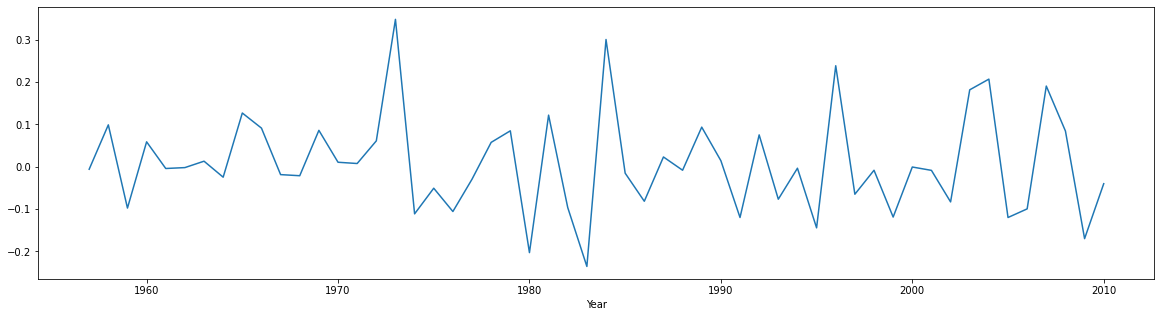

In [769]:
agri_productivity = (US_VA['agri_share'] * 1000)/ US_emp['agri_share']
agri_productivity.pct_change().plot(figsize = (20, 5))

In [770]:
agri_productivity_norm = agri_productivity / agri_productivity[1956]

<AxesSubplot:xlabel='Year'>

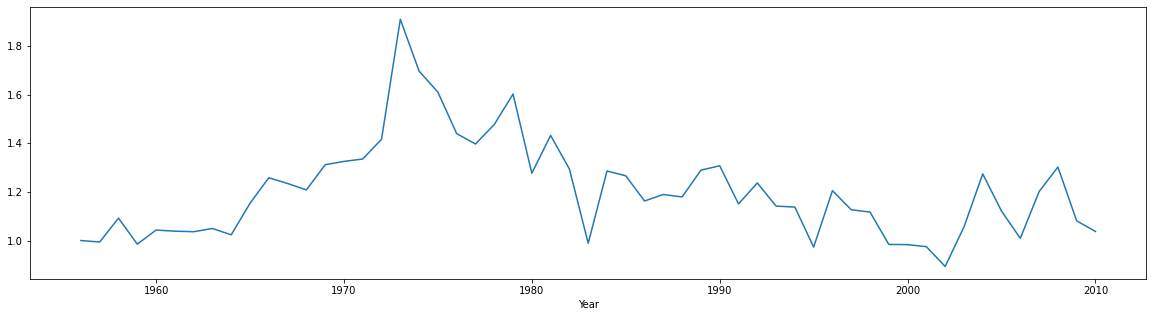

In [771]:
agri_productivity_norm.plot(figsize = (20, 5))

Year
1956    NaN
1957   0.99
1958   1.09
1959   0.99
1960   1.04
       ... 
2006   1.01
2007   1.20
2008   1.30
2009   1.08
2010   1.04
Name: agri_share, Length: 55, dtype: float64

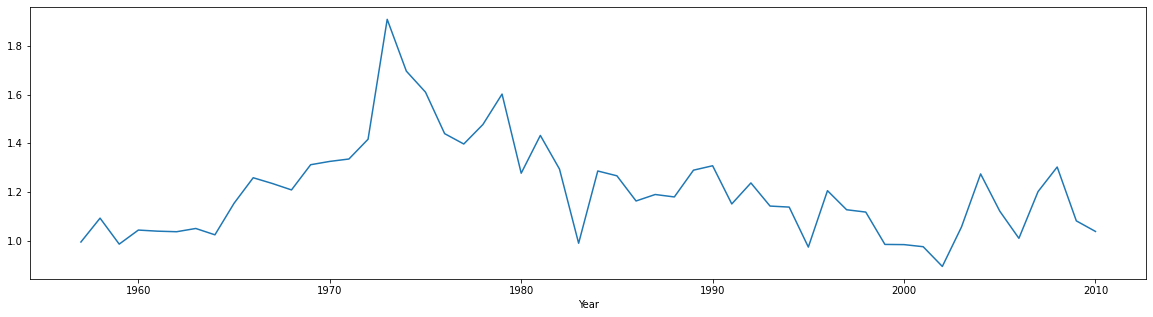

In [772]:
TFP_agri = (1+ agri_productivity.pct_change()).cumprod()
(1+ agri_productivity.pct_change()).cumprod().plot(figsize = (20, 5))
TFP_agri

In [773]:
((0.61/0.62)**(1/45) - 1) * 100

-0.03612796310531463

In [774]:
manu_productivity = US_VA['manu_share'] / US_emp['manu_share']
TFP_manu =  (1+ manu_productivity.pct_change()).cumprod()

In [775]:
service_productivity = US_VA['service_share'] / US_emp['service_share']
TFP_service = (1 + service_productivity.pct_change()).cumprod()

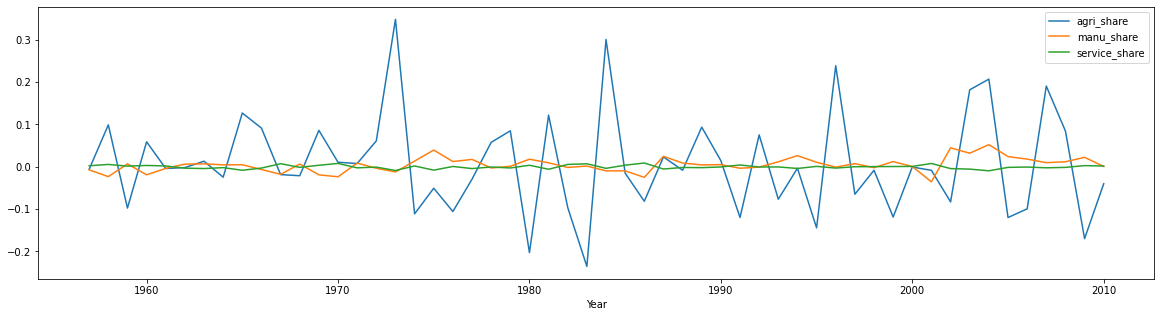

In [776]:
agri_productivity.pct_change().plot(figsize = (20, 5))
manu_productivity.pct_change().plot(figsize = (20, 5))
service_productivity.pct_change().plot(figsize = (20, 5))
plt.legend()
plt.show()

In [777]:
TFP_agri = TFP_agri / (TFP_agri + TFP_manu + TFP_service )


In [778]:
TFP_manu = TFP_manu / (TFP_agri + TFP_manu + TFP_service )

In [779]:
TFP_service = TFP_service / (TFP_agri + TFP_manu + TFP_service )

In [780]:
agri_productivity_norm = agri_productivity/ (agri_productivity + manu_productivity+service_productivity)
manu_productivity_norm = manu_productivity/ (agri_productivity + manu_productivity+service_productivity)
service_productivity_norm = service_productivity/ (agri_productivity + manu_productivity+service_productivity)

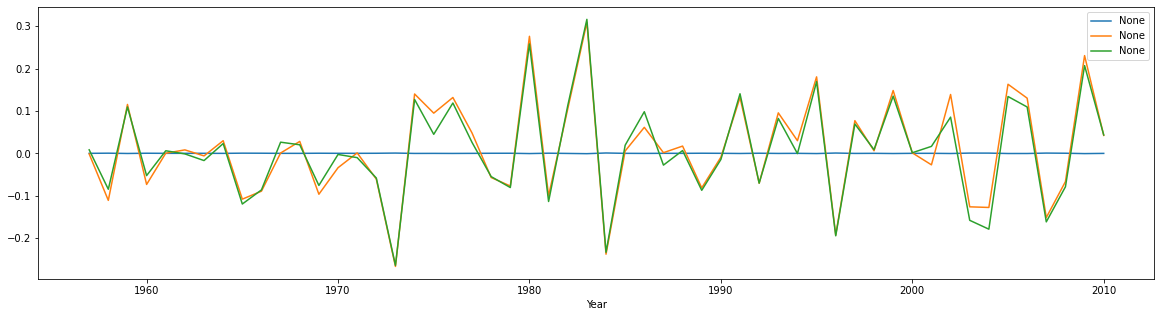

In [781]:
agri_productivity_norm.pct_change().plot(figsize = (20, 5))
manu_productivity_norm.pct_change().plot(figsize = (20, 5))
service_productivity_norm.pct_change().plot(figsize = (20, 5))
plt.legend()
plt.show()

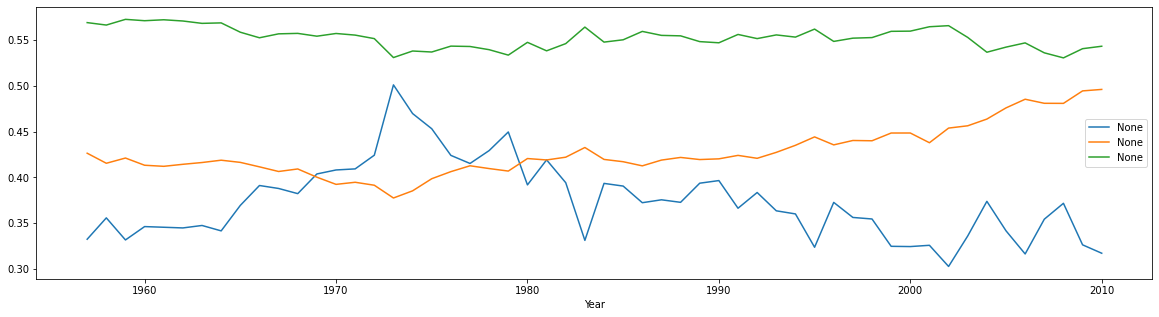

In [782]:
TFP_agri.plot(figsize = (20, 5))
TFP_manu.plot(figsize = (20, 5))
TFP_service.plot(figsize = (20, 5))
plt.legend()
plt.show()

In [783]:
pwt = pd.read_stata('/users/quasar/downloads/pwt100.dta')
pwt.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,cn,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,i_irr,cor_exp,statcap,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [784]:
pwt_US = pwt.loc[pwt['country'] == 'United States']
pwt_US = pwt_US.loc[(pwt_US['year'] >= 1956) & (pwt_US['year'] <=2004)] 
pwt_US = pwt_US.set_index('year')

In [785]:
pwt_US.head() 

,countrycode,country,currency_unit,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,cn,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,i_irr,cor_exp,statcap,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1956,USA,United States,US Dollar,"3,123,382.25","3,157,588.25",172.58,69.13,"1,990.46",2.66,"2,407,983.50","3,172,366.25","3,187,240.00","3,184,018.50","12,944,298.00",1.00,1.00,1.00,"3,159,364.75","2,715,602.25","3,230,657.25","12,946,795.00",0.13,0.67,0.66,0.64,0.08,0.03,1.00,0.14,0.14,0.14,Extrapolated,Extrapolated,Market-based,Regular,Regular,NaN,NaN,0.63,0.24,0.13,0.05,-0.04,-0.00,0.14,0.14,0.18,0.10,0.09,0.10,1.00
1957,USA,United States,US Dollar,"3,191,923.00","3,226,404.75",175.73,69.47,"1,962.60",2.68,"2,466,107.00","3,230,372.75","3,257,928.00","3,252,465.00","13,368,356.00",1.00,1.00,1.00,"3,225,886.00","2,789,832.50","3,291,119.75","13,370,985.00",0.13,0.67,0.66,0.64,0.08,0.03,1.00,0.15,0.15,0.15,Extrapolated,Extrapolated,Market-based,Regular,Regular,NaN,NaN,0.63,0.23,0.13,0.05,-0.04,-0.00,0.14,0.14,0.18,0.11,0.09,0.11,1.00
1958,USA,United States,US Dollar,"3,170,179.25","3,193,747.00",178.69,68.22,"1,928.46",2.69,"2,489,011.25","3,236,840.25","3,240,497.75","3,228,752.25","13,752,067.00",1.00,1.00,1.00,"3,202,169.00","2,818,969.00","3,295,397.50","13,754,814.00",0.13,0.68,0.67,0.64,0.08,0.03,1.00,0.15,0.15,0.15,Extrapolated,Extrapolated,Market-based,Regular,Regular,NaN,NaN,0.64,0.23,0.13,0.04,-0.04,-0.00,0.14,0.14,0.19,0.11,0.09,0.11,1.00
1959,USA,United States,US Dollar,"3,400,211.50","3,426,015.75",181.70,69.78,"1,953.84",2.71,"2,583,250.50","3,459,776.75","3,462,320.50","3,452,001.75","14,237,032.00",1.00,1.00,1.00,"3,423,191.00","2,944,096.75","3,523,328.75","14,239,896.00",0.14,0.69,0.69,0.63,0.08,0.03,1.00,0.15,0.15,0.15,Extrapolated,Extrapolated,Market-based,Regular,Regular,NaN,NaN,0.62,0.25,0.13,0.04,-0.04,-0.00,0.15,0.14,0.19,0.11,0.10,0.11,1.00
1960,USA,United States,US Dollar,"3,489,113.75","3,522,116.25",184.60,70.96,"1,935.26",2.72,"2,674,162.50","3,537,841.25","3,565,274.75","3,540,698.75","14,712,712.00",1.00,1.00,1.00,"3,510,944.75","3,011,988.00","3,589,245.25","14,711,919.00",0.14,0.70,0.69,0.64,0.08,0.03,1.00,0.16,0.15,0.15,Extrapolated,Extrapolated,Market-based,Regular,Regular,NaN,NaN,0.63,0.24,0.12,0.05,-0.05,-0.00,0.15,0.14,0.19,0.11,0.09,0.11,1.00


In [786]:
pwt_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 1956 to 2004
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   countrycode    49 non-null     object  
 1   country        49 non-null     object  
 2   currency_unit  49 non-null     object  
 3   rgdpe          49 non-null     float32 
 4   rgdpo          49 non-null     float32 
 5   pop            49 non-null     float64 
 6   emp            49 non-null     float32 
 7   avh            49 non-null     float64 
 8   hc             49 non-null     float32 
 9   ccon           49 non-null     float32 
 10  cda            49 non-null     float32 
 11  cgdpe          49 non-null     float32 
 12  cgdpo          49 non-null     float32 
 13  cn             49 non-null     float32 
 14  ck             49 non-null     float32 
 15  ctfp           49 non-null     float32 
 16  cwtfp          49 non-null     float32 
 17  rgdpna         49 non-null     f

1. Normalize productivity levels to one in 1956
2. growth rate of sectoral value added per hour in the US to obtain the time paths of sectoral labour productivity 
3. $\gamma_{i, t}$ the gorwht rate of labour productivity in sector i at date t 

$$
A_{i, t+1} = (1 + \gamma_{i, t}) A_{i, t}
$$

Values of a, $\overline{a}$, $\overline{s}$, b, $\rho$

given values of $\rho$ and b, remaining other are calculated to match shares of hours in agriculture and manufcaturing in US using equation 7 and 8.

equation 7

from First order conditions for consumption imply that the labour input in agriculture is given by 

$$
L_a = (1 - a) \frac{\overline{a}}{A_a} + a(L + \frac{\overline{s}}{A_s})
$$

equation 8 

$$
L_m  = \frac{(L - L_a) + \overline{s} / A_s} {1 + x} 
$$

where 
$$
x = \frac{b}{1-b}^{1/(\rho -1)} \frac{A_m}{A_s}^{\rho / (\rho-1)}
$$

b and $\rho$ are jointly chosen to match as close as possible the shares of hours in manufacturing over time and the annualized growth rate of aggregate productivity. 

annualized growth rate of productivity in US between 1956 and 2004 is roughly 2% 


In [787]:
pwt_6_2 = pd.read_excel('/users/quasar/downloads/pwt62_data.xlsx', sheet_name='Data')

In [788]:
pwt62_US = pwt_6_2.loc[pwt_6_2['country'] == 'United States']
pwt62_US = pwt62_US.loc[(pwt62_US['year'] >= 1956) & (pwt62_US['year'] <=2004)] 
pwt62_US = pwt62_US.set_index('year')

In [789]:
pwt62_US.head()

,country,country isocode,POP,XRAT,PPP,cgdp,cc,cg,ci,p,pc,pg,pi,openc,cgnp,y,rgdpl,rgdpch,rgdpeqa,rgdpwok,rgdptt,openk,kc,kg,ki,grgdpch
year,,,,,,,,,,,,,,,,,,,,,,,,,,
1956,United States,USA,"174,094.10",1,1,"2,490.27",65.89,13.31,20.13,100,95.14,127.56,97.69,9.42,na,100,"12,785.62","12,668.40","14,882.99","30,450.57","12,922.81",7.19,64.61,18.87,16.88,0.14
1957,United States,USA,"177,132.20",1,1.00,"2,576.37",66.14,13.97,18.84,100.00,95.02,127.03,97.46,9.80,na,100,"12,766.99","12,596.69","14,821.38","30,444.14","12,937.56",7.51,65.00,19.53,15.69,-0.57
1958,United States,USA,"180,165.20",1,1,"2,579.33",67.04,14.56,18.10,100,95.27,126.71,96.05,8.85,na,100,"12,435.64","12,237.84","14,421.21","29,744.26","12,579.93",7.23,65.61,20.08,15.14,-2.85
1959,United States,USA,183178,1,1,"2,739.66",66.58,14.02,19.55,100,95.11,127.49,96.96,8.74,na,100,"12,932.82","12,789.69","15,094.65","31,261.53","13,071.27",7.42,65.62,19.20,16.40,4.51
1960,United States,USA,"186,158.30",1,1,"2,801.57",66.61,13.68,18.99,100,95.49,126.80,96.52,9.45,99.88,100,"13,029.62","12,892.02","15,238.79","31,691.30","13,205.96",7.92,65.84,18.75,16.02,0.80


In [790]:
pwt62_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 1956 to 2004
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          49 non-null     object
 1   country isocode  49 non-null     object
 2   POP              49 non-null     object
 3   XRAT             49 non-null     object
 4   PPP              49 non-null     object
 5   cgdp             49 non-null     object
 6   cc               49 non-null     object
 7   cg               49 non-null     object
 8   ci               49 non-null     object
 9   p                49 non-null     object
 10  pc               49 non-null     object
 11  pg               49 non-null     object
 12  pi               49 non-null     object
 13  openc            49 non-null     object
 14  cgnp             49 non-null     object
 15  y                49 non-null     object
 16  rgdpl            49 non-null     object
 17  rgdpch           49 non-null    

In [791]:
# Annual time series of PPP adjusted GDP per hour in constant prices for each country 
# pwt_US['Y_Lh'] = (pwt62_US['rgdpl'] * )/ (pwt62_US.)

Assumption in QJE paper for calibration 

1. Long run share of agriculture is 1% 
2. For given value of $\rho$ and b and $\overline{a}$, $\overline{s}$ are chose to match shares of hours in agriculture and manufacturing in the US 1956 using equation 7 and equation 8. 
3. Finally b and $\rho$ are jointly chosen to match as close as possible the share of hours in manufacturing over time and the annualized growth rate of aggregate productivity.
 

- a = 0.02 
- a_bar = 0.11 (share of hours in agriculture 1956)
- s_bar = 0.89 (share of hours in industry 1956)
- b = 0.04 share of hours in industry 1957-2004
- rho = -1.5 (aggregate productivity growth)

Following Appendix part to create dataset

- Total Economy Database for Employment(EMP) and annual hourse actually worked per person employed (HOURS)
- With these data we construct annual time series of PPP-adjusted GDP per hour in constant prices for each country 
as Y Lh = RGDPL * POP / (EMP * HOURS)

In [792]:
# database = pd.read_excel('/users/quasar/downloads/TED_1_AUGUST20211.xlsx', sheet_name='DATA')
# database.head()

In [793]:
duarte = pd.read_excel('/users/quasar/downloads/DR2_QJE_data.xls', sheet_name='Sheet1')
duarte

,country,year,sEhi_ag,sEhi_ind,sEhi_srv,yEhi_ag,yEhi_ind,yEhi_srv,YLh,RelYLh
0,Argentina,1950,0.27,0.29,0.44,2.16,8.06,12.45,8.37,0.58
1,Argentina,1951,0.27,0.29,0.44,2.24,7.95,12.55,8.44,0.57
2,Argentina,1952,0.26,0.30,0.44,2.32,7.85,12.66,8.51,0.56
3,Argentina,1953,0.26,0.30,0.44,2.41,7.75,12.77,8.59,0.55
4,Argentina,1954,0.25,0.31,0.44,2.50,7.67,12.89,8.68,0.55
...,...,...,...,...,...,...,...,...,...,...
1365,US,2000,0.03,0.25,0.71,12.29,35.64,40.05,37.98,1.00
1366,US,2001,0.03,0.25,0.72,12.81,36.80,40.81,38.86,1.00
1367,US,2002,0.03,0.24,0.72,13.36,38.04,41.60,39.77,1.00
1368,US,2003,0.03,0.24,0.73,13.96,39.34,42.42,40.73,1.00


The sectoral data for Duarte and Restuccia (QJE, 2010) is contained in a Matlab
file: DR2_data_sEhiYLhii.mat. This file contains a 2x29 cell array called sEhiYLhii
with shares of hours and output per hour by sector, aggregate output per hour, and
aggregate output per hour relative to that of the United States. 
The first dimension of the cell array consists of (29) matrices with the data, one
matrix for each country. The dimension of each matrix is years x 9. Data is by
column, in the following order
[year sEhi(Ag) sEhi(Ind) sEhi(Srv) YLhi(Ag) YLhi(Ind) YLhi(Srv) YLh RelYLh] 
where sEhi is (sectoral) shares of hours and YLhi is (sectoral) value added per
hour. Years vary by country. 
The second dimension of the cell array is the country name. So, for example,
sEhiYLhii{2,1} gives 'Argentina' and sEhiYLhii{1,1} gives the entire year x 9 matrix
with data for Argentina. The sectors definitions is in the appendix of the paper.

An excel file is also provided.

Note that this data is the trended component of the original series using the HP
filter with lambda 100.

In [794]:
duarte.country.unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Denmark',
       'Spain', 'Finland', 'France', 'United Kingdom', 'Greece',
       'Ireland', 'Italy', 'Japan', 'Korea', 'Mexico', 'Netherlands',
       'Norway', 'New Zealand', 'Portugal', 'Sweden', 'Turkey',
       'Venezuela', 'US'], dtype=object)

In [795]:
duarte_US = duarte.loc[duarte['country'] == 'US']
duarte_US = duarte_US.loc[(duarte_US['year'] >= 1956) & (duarte_US['year'] <=2004)] 
duarte_US = duarte_US.set_index('year')

In [796]:
duarte_US

,country,sEhi_ag,sEhi_ind,sEhi_srv,yEhi_ag,yEhi_ind,yEhi_srv,YLh,RelYLh
year,,,,,,,,,
1956,US,0.13,0.39,0.49,2.50,13.33,23.05,16.67,1.00
1957,US,0.12,0.39,0.49,2.61,13.69,23.29,17.07,1.00
1958,US,0.12,0.38,0.50,2.74,14.07,23.55,17.50,1.00
1959,US,0.11,0.38,0.51,2.87,14.48,23.83,17.94,1.00
1960,US,0.10,0.38,0.51,3.01,14.91,24.14,18.41,1.00
1961,US,0.10,0.38,0.52,3.16,15.36,24.49,18.90,1.00
1962,US,0.09,0.38,0.53,3.31,15.83,24.88,19.42,1.00
1963,US,0.09,0.38,0.53,3.48,16.32,25.29,19.95,1.00
1964,US,0.08,0.38,0.54,3.65,16.80,25.72,20.49,1.00


<AxesSubplot:title={'center':'US Sectoral Share of labour distribution'}, xlabel='year'>

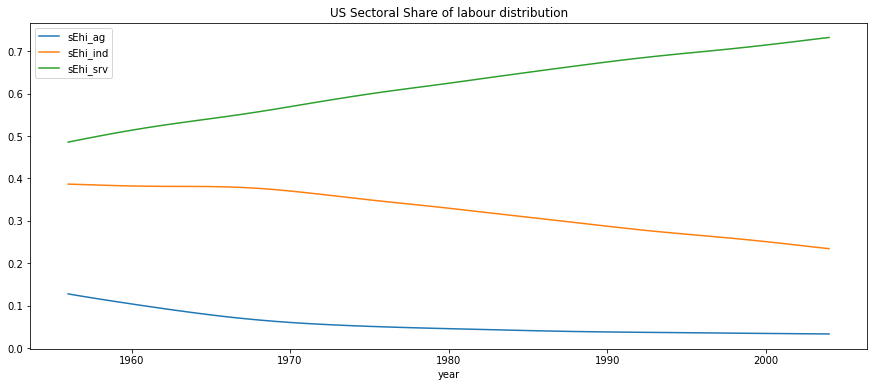

In [797]:
duarte_US[['sEhi_ag','sEhi_ind', 'sEhi_srv']].plot(figsize = (15, 6), title = 'US Sectoral Share of labour distribution')

In [798]:
US = duarte_US.copy()
US['agri_prod'] = US.yEhi_ag / US.sEhi_ag
US['ind_prod']  = US.yEhi_ind / US.sEhi_ind
US['srv_prod']  = US.yEhi_srv / US.sEhi_srv
US

,country,sEhi_ag,sEhi_ind,sEhi_srv,yEhi_ag,yEhi_ind,yEhi_srv,YLh,RelYLh,agri_prod,ind_prod,srv_prod
year,,,,,,,,,,,,
1956,US,0.13,0.39,0.49,2.50,13.33,23.05,16.67,1.00,19.52,34.47,47.48
1957,US,0.12,0.39,0.49,2.61,13.69,23.29,17.07,1.00,21.49,35.51,47.24
1958,US,0.12,0.38,0.50,2.74,14.07,23.55,17.50,1.00,23.68,36.62,47.07
1959,US,0.11,0.38,0.51,2.87,14.48,23.83,17.94,1.00,26.13,37.79,46.99
1960,US,0.10,0.38,0.51,3.01,14.91,24.14,18.41,1.00,28.88,39.00,47.01
1961,US,0.10,0.38,0.52,3.16,15.36,24.49,18.90,1.00,31.99,40.25,47.13
1962,US,0.09,0.38,0.53,3.31,15.83,24.88,19.42,1.00,35.51,41.52,47.35
1963,US,0.09,0.38,0.53,3.48,16.32,25.29,19.95,1.00,39.49,42.80,47.65
1964,US,0.08,0.38,0.54,3.65,16.80,25.72,20.49,1.00,43.96,44.09,48.00


<AxesSubplot:xlabel='year'>

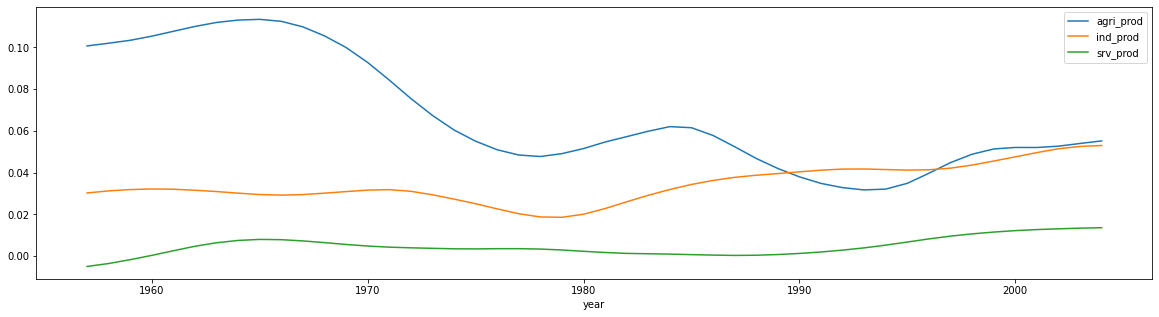

In [799]:
US[['agri_prod', 'ind_prod', 'srv_prod']].pct_change().plot(figsize = (20, 5))

In [800]:
US['agri_prod_norm'] = US.agri_prod / US.agri_prod[1956]
US['ind_prod_norm']  = US.ind_prod / US.ind_prod[1956]
US['srv_prod_norm']  = US.srv_prod / US.srv_prod[1956]
US
# agri_productivity_norm = agri_productivity / agri_productivity[1956]

,country,sEhi_ag,sEhi_ind,sEhi_srv,yEhi_ag,yEhi_ind,yEhi_srv,YLh,RelYLh,agri_prod,ind_prod,srv_prod,agri_prod_norm,ind_prod_norm,srv_prod_norm
year,,,,,,,,,,,,,,,
1956,US,0.13,0.39,0.49,2.50,13.33,23.05,16.67,1.00,19.52,34.47,47.48,1.00,1.00,1.00
1957,US,0.12,0.39,0.49,2.61,13.69,23.29,17.07,1.00,21.49,35.51,47.24,1.10,1.03,1.00
1958,US,0.12,0.38,0.50,2.74,14.07,23.55,17.50,1.00,23.68,36.62,47.07,1.21,1.06,0.99
1959,US,0.11,0.38,0.51,2.87,14.48,23.83,17.94,1.00,26.13,37.79,46.99,1.34,1.10,0.99
1960,US,0.10,0.38,0.51,3.01,14.91,24.14,18.41,1.00,28.88,39.00,47.01,1.48,1.13,0.99
1961,US,0.10,0.38,0.52,3.16,15.36,24.49,18.90,1.00,31.99,40.25,47.13,1.64,1.17,0.99
1962,US,0.09,0.38,0.53,3.31,15.83,24.88,19.42,1.00,35.51,41.52,47.35,1.82,1.20,1.00
1963,US,0.09,0.38,0.53,3.48,16.32,25.29,19.95,1.00,39.49,42.80,47.65,2.02,1.24,1.00
1964,US,0.08,0.38,0.54,3.65,16.80,25.72,20.49,1.00,43.96,44.09,48.00,2.25,1.28,1.01


In [801]:
US['agg_prod'] = (US.sEhi_ag * US.agri_prod_norm) + (US.sEhi_ind * US.ind_prod_norm) + (US.sEhi_srv * US.srv_prod_norm)
US['agg_prod_growth'] = US['agg_prod'].pct_change()
US['agg_prod_growth'][1956] = 0.02
US

/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_1521/2092412160.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US['agg_prod_growth'][1956] = 0.02


,country,sEhi_ag,sEhi_ind,sEhi_srv,yEhi_ag,yEhi_ind,yEhi_srv,YLh,RelYLh,agri_prod,ind_prod,srv_prod,agri_prod_norm,ind_prod_norm,srv_prod_norm,agg_prod,agg_prod_growth
year,,,,,,,,,,,,,,,,,
1956,US,0.13,0.39,0.49,2.50,13.33,23.05,16.67,1.00,19.52,34.47,47.48,1.00,1.00,1.00,1.00,0.02
1957,US,0.12,0.39,0.49,2.61,13.69,23.29,17.07,1.00,21.49,35.51,47.24,1.10,1.03,1.00,1.02,0.02
1958,US,0.12,0.38,0.50,2.74,14.07,23.55,17.50,1.00,23.68,36.62,47.07,1.21,1.06,0.99,1.04,0.02
1959,US,0.11,0.38,0.51,2.87,14.48,23.83,17.94,1.00,26.13,37.79,46.99,1.34,1.10,0.99,1.07,0.02
1960,US,0.10,0.38,0.51,3.01,14.91,24.14,18.41,1.00,28.88,39.00,47.01,1.48,1.13,0.99,1.10,0.02
1961,US,0.10,0.38,0.52,3.16,15.36,24.49,18.90,1.00,31.99,40.25,47.13,1.64,1.17,0.99,1.12,0.03
1962,US,0.09,0.38,0.53,3.31,15.83,24.88,19.42,1.00,35.51,41.52,47.35,1.82,1.20,1.00,1.15,0.03
1963,US,0.09,0.38,0.53,3.48,16.32,25.29,19.95,1.00,39.49,42.80,47.65,2.02,1.24,1.00,1.18,0.03
1964,US,0.08,0.38,0.54,3.65,16.80,25.72,20.49,1.00,43.96,44.09,48.00,2.25,1.28,1.01,1.22,0.03


<AxesSubplot:xlabel='year'>

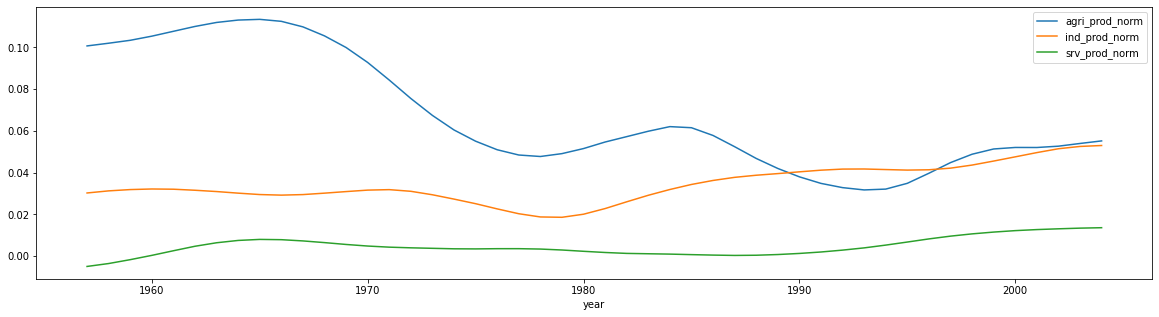

In [802]:
US[['agri_prod_norm', 'ind_prod_norm', 'srv_prod_norm']].pct_change().plot(figsize = (20, 5))

In [803]:
US['agri_TFP'] = (1+ US.agri_prod_norm.pct_change()).cumprod()
US['ind_TFP']  = (1+ US.ind_prod_norm.pct_change()).cumprod()
US['srv_TFP']  = (1+ US.srv_prod_norm.pct_change()).cumprod()
US

,country,sEhi_ag,sEhi_ind,sEhi_srv,yEhi_ag,yEhi_ind,yEhi_srv,YLh,RelYLh,agri_prod,ind_prod,srv_prod,agri_prod_norm,ind_prod_norm,srv_prod_norm,agg_prod,agg_prod_growth,agri_TFP,ind_TFP,srv_TFP
year,,,,,,,,,,,,,,,,,,,,
1956,US,0.13,0.39,0.49,2.50,13.33,23.05,16.67,1.00,19.52,34.47,47.48,1.00,1.00,1.00,1.00,0.02,NaN,NaN,NaN
1957,US,0.12,0.39,0.49,2.61,13.69,23.29,17.07,1.00,21.49,35.51,47.24,1.10,1.03,1.00,1.02,0.02,1.10,1.03,1.00
1958,US,0.12,0.38,0.50,2.74,14.07,23.55,17.50,1.00,23.68,36.62,47.07,1.21,1.06,0.99,1.04,0.02,1.21,1.06,0.99
1959,US,0.11,0.38,0.51,2.87,14.48,23.83,17.94,1.00,26.13,37.79,46.99,1.34,1.10,0.99,1.07,0.02,1.34,1.10,0.99
1960,US,0.10,0.38,0.51,3.01,14.91,24.14,18.41,1.00,28.88,39.00,47.01,1.48,1.13,0.99,1.10,0.02,1.48,1.13,0.99
1961,US,0.10,0.38,0.52,3.16,15.36,24.49,18.90,1.00,31.99,40.25,47.13,1.64,1.17,0.99,1.12,0.03,1.64,1.17,0.99
1962,US,0.09,0.38,0.53,3.31,15.83,24.88,19.42,1.00,35.51,41.52,47.35,1.82,1.20,1.00,1.15,0.03,1.82,1.20,1.00
1963,US,0.09,0.38,0.53,3.48,16.32,25.29,19.95,1.00,39.49,42.80,47.65,2.02,1.24,1.00,1.18,0.03,2.02,1.24,1.00
1964,US,0.08,0.38,0.54,3.65,16.80,25.72,20.49,1.00,43.96,44.09,48.00,2.25,1.28,1.01,1.22,0.03,2.25,1.28,1.01


<AxesSubplot:xlabel='year'>

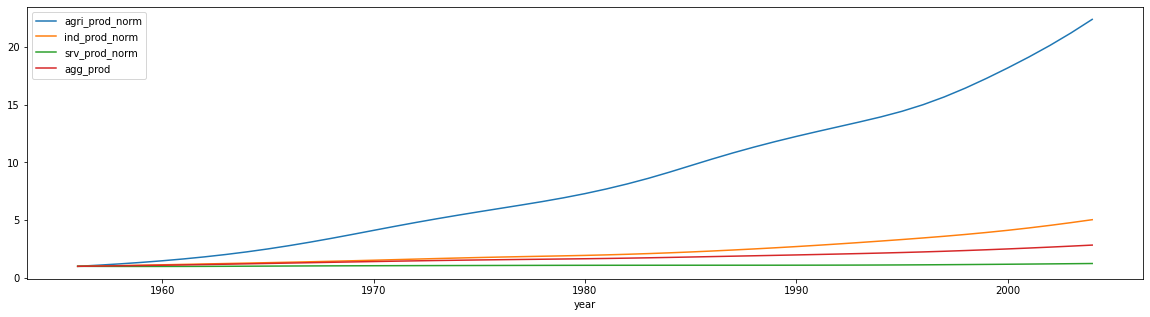

In [804]:
US[['agri_prod_norm', 'ind_prod_norm', 'srv_prod_norm', 'agg_prod']].plot(figsize = (20, 5))

- a = 0.01
- a_bar = 0.11 (share of hours in agriculture 1956)
- s_bar = 0.89 (share of hours in industry 1956)
- b = 0.04 share of hours in industry 1957-2004
- rho = -1.5 (aggregate productivity growth)

Check for hodrick prescott filter with $\lambda$ = 100 - this may be cause of variation in results 

$\overline{s}$ =  (0 , inf) \
b = (0, 1) \
$\rho$  = (-inf, 1)

In [805]:
from scipy.optimize import curve_fit

In [806]:
# initial values for constant or targeting value 
a = 0.01 
L = 1 

# rho = -1.5 
# b = 0.04 # value of b lies between 0 and 1 

A_a = US['agri_prod_norm']
A_m = US['ind_prod_norm']
A_s = US['srv_prod_norm']

L_a = US['sEhi_ag']

In [807]:
def func(X, a_bar, s_bar):
          A_a, A_m, A_s = X 
          L_a = (((1 - a) * (a_bar/A_a)) + (a * ( L + (s_bar / A_s)))) 
          return L_a

In [808]:
parameters1, covariance1 = curve_fit(func, (A_a, A_m, A_s), L_a, bounds=([0, 0], [1, 1]))

# values of a_bar and s_bar
parameters1

array([0.13096801, 1.        ])

In [809]:
L_a_calc = func((A_a, A_m, A_s), a_bar=parameters1[0], s_bar=parameters1[1])
L_a_calc

year
1956   0.15
1957   0.14
1958   0.13
1959   0.12
1960   0.11
1961   0.10
1962   0.09
1963   0.08
1964   0.08
1965   0.07
1966   0.07
1967   0.06
1968   0.06
1969   0.05
1970   0.05
1971   0.05
1972   0.05
1973   0.04
1974   0.04
1975   0.04
1976   0.04
1977   0.04
1978   0.04
1979   0.04
1980   0.04
1981   0.04
1982   0.04
1983   0.03
1984   0.03
1985   0.03
1986   0.03
1987   0.03
1988   0.03
1989   0.03
1990   0.03
1991   0.03
1992   0.03
1993   0.03
1994   0.03
1995   0.03
1996   0.03
1997   0.03
1998   0.03
1999   0.03
2000   0.03
2001   0.03
2002   0.02
2003   0.02
2004   0.02
dtype: float64

In [810]:
def func_1(X, a_bar, s_bar, b, rho):
          A_a, A_m, A_s= X 
          # s_bar = 0.89

          # L_a = func((A_a, A_m, A_s), a_bar=parameters1[0], s_bar=parameters1[1])
          L_a = func((A_a, A_m, A_s), a_bar, s_bar)

          # s_bar = parameters1[1]
          x = (b/(1-b))**(1/(rho-1)) * (A_m/A_s)**(rho/(rho-1))
          L_m = ((L - L_a) + (s_bar/ A_s))/ (1+x)
          #print(L_a)

          return L_m

In [811]:
L_m = US['sEhi_ind']
L_s = US['sEhi_srv'] # sEhi_ag sEhi_ind	sEhi_srv

parameters2, covariance2 = curve_fit(func_1, (A_a, A_m, A_s), L_m, bounds=([0, 0, 0, -np.inf], [1, 1, 1, 1]))

# rh0 bound = (1, +np.inf) - check of CES
parameters2

array([ 0.14641505,  0.25898481,  0.18227519, -1.46011016])

In [812]:
L_m_calc = func_1((A_a, A_m, A_s), a_bar = parameters2[0], s_bar = parameters2[1], b=parameters2[2], rho=parameters2[3])
L_m_calc

year
1956   0.39
1957   0.39
1958   0.39
1959   0.39
1960   0.38
1961   0.38
1962   0.38
1963   0.38
1964   0.38
1965   0.38
1966   0.37
1967   0.37
1968   0.37
1969   0.37
1970   0.36
1971   0.36
1972   0.36
1973   0.35
1974   0.35
1975   0.35
1976   0.34
1977   0.34
1978   0.34
1979   0.34
1980   0.34
1981   0.33
1982   0.33
1983   0.33
1984   0.32
1985   0.32
1986   0.31
1987   0.31
1988   0.30
1989   0.30
1990   0.29
1991   0.29
1992   0.28
1993   0.28
1994   0.27
1995   0.27
1996   0.26
1997   0.26
1998   0.26
1999   0.25
2000   0.25
2001   0.24
2002   0.24
2003   0.23
2004   0.23
dtype: float64

In [813]:
agg_prod_arr = []
agg_prod_growth_arr = []

In [814]:
def agg_prod_growth_calc(agg_prod_arr, agg_prod):
          return (agg_prod - agg_prod_arr[0][-1])/ (agg_prod_arr[0][-1])

In [815]:
def func_1_2(X, a_bar, s_bar, b, rho):
          A_a, A_m, A_s = X 

          # a_bar = parameters1[0]
          # s_bar = parameters1[1]

          # L_a = (((1 - a) * (a_bar/A_a)) + (a * ( L + (s_bar / A_s)))) 
          # x = (b/(1-b))**(1/(rho-1)) * (A_m/A_s)**(rho/(rho-1))
          # L_m = ((L - L_a) + (s_bar/ A_s))/ (1+x)
          # L_s = L - L_a - L_m

          L_a = func((A_a, A_m, A_s), a_bar, s_bar)
          L_m = func_1((A_a, A_m, A_s), a_bar, s_bar, b, rho)
          L_s = 1 - L_a - L_m


          agg_prod = (L_a * A_a) + (L_m * A_m) + (L_s * A_s) 

          agg_prod_arr.append(agg_prod)
          
          # agg_prod_growth = []
          # agg_prod_growth[0] = 0.02

          # for i in range(1, len(agg_prod)-1):
          # agg_prod_growth[i] = ((agg_prod[i+1] - agg_prod[i])/ agg_prod[i])
          if len(agg_prod_arr) == 1:
                     agg_prod_growth = 0.02

          else:
                    # agg_prod_growth = (agg_prod - agg_prod_arr[0][-1])/ (agg_prod_arr[0][-1])
                    # agg_prod_growth = np.diff(agg_prod) / agg_prod[:,1:]
                    agg_prod_growth = agg_prod_growth_calc(agg_prod_arr, agg_prod)

          agg_prod_growth_arr.append(agg_prod_growth)

          return agg_prod_growth

In [816]:
parameters2, covariance2 = curve_fit(func_1_2, (A_a, A_m, A_s), US.agg_prod_growth, bounds=([0, 0, 0, -np.inf], [1, 1, 1, 1])) # .1 -> 1
# use maxfev = 10000, p0 = [0.04, -1.5]
# rho bound = (1, +np.inf) - check of CES
parameters2

array([0.5, 0.5, 0.5, 0. ])

In [817]:
(agg_prod_arr[0][-1] - agg_prod_arr[0][-2]) / agg_prod_arr[0][-2]

0.04242490264915054

In [818]:
US.agg_prod_growth

year
1956   0.02
1957   0.02
1958   0.02
1959   0.02
1960   0.02
1961   0.03
1962   0.03
1963   0.03
1964   0.03
1965   0.03
1966   0.03
1967   0.03
1968   0.03
1969   0.02
1970   0.02
1971   0.02
1972   0.02
1973   0.02
1974   0.02
1975   0.02
1976   0.01
1977   0.01
1978   0.01
1979   0.01
1980   0.01
1981   0.01
1982   0.02
1983   0.02
1984   0.02
1985   0.02
1986   0.02
1987   0.02
1988   0.02
1989   0.02
1990   0.02
1991   0.02
1992   0.02
1993   0.02
1994   0.02
1995   0.02
1996   0.02
1997   0.03
1998   0.03
1999   0.03
2000   0.03
2001   0.03
2002   0.03
2003   0.03
2004   0.03
Name: agg_prod_growth, dtype: float64

In [819]:
(1.04246151-1)/1, (1.08634441-1.04246151)/1.04246151

(0.04246151000000009, 0.042095463073739604)

In [820]:
agg_prod_arr

[array([1.        , 1.06240881, 1.12355193, 1.18361178, 1.24288101,
        1.30142546, 1.35910738, 1.41579707, 1.4712544 , 1.52544222,
        1.57850532, 1.63074233, 1.68248487, 1.73389406, 1.78496703,
        1.83530262, 1.88395988, 1.93017451, 1.97361219, 2.01429544,
        2.05195423, 2.08690616, 2.12031388, 2.15426602, 2.19113691,
        2.23290119, 2.280493  , 2.33419467, 2.39388949, 2.45896644,
        2.52842944, 2.60157614, 2.67782049, 2.7571393 , 2.83997419,
        2.92661949, 3.01699762, 3.11049336, 3.20682732, 3.30663191,
        3.41147769, 3.52317135, 3.6436392 , 3.77432501, 3.91582979,
        4.06897262, 4.23449739, 4.41144028, 4.59859521]),
 array([1.        , 1.06240881, 1.12355193, 1.18361178, 1.24288102,
        1.30142546, 1.35910738, 1.41579708, 1.47125441, 1.52544223,
        1.57850532, 1.63074234, 1.68248488, 1.73389407, 1.78496704,
        1.83530263, 1.88395989, 1.93017452, 1.97361221, 2.01429545,
        2.05195424, 2.08690618, 2.12031389, 2.15426604, 2.

In [821]:
agg_prod_growth_arr

[0.02,
 array([-7.82542286e-01, -7.68971009e-01, -7.55674967e-01, -7.42614488e-01,
        -7.29725936e-01, -7.16994995e-01, -7.04451616e-01, -6.92124005e-01,
        -6.80064380e-01, -6.68280820e-01, -6.56741841e-01, -6.45382499e-01,
        -6.34130684e-01, -6.22951359e-01, -6.11845149e-01, -6.00899287e-01,
        -5.90318390e-01, -5.80268662e-01, -5.70822802e-01, -5.61975916e-01,
        -5.53786722e-01, -5.46186154e-01, -5.38921388e-01, -5.31538233e-01,
        -5.23520374e-01, -5.14438409e-01, -5.04089204e-01, -4.92411362e-01,
        -4.79430261e-01, -4.65278777e-01, -4.50173512e-01, -4.34267198e-01,
        -4.17687276e-01, -4.00438790e-01, -3.82425703e-01, -3.63584013e-01,
        -3.43930592e-01, -3.23599223e-01, -3.02650661e-01, -2.80947383e-01,
        -2.58147858e-01, -2.33859210e-01, -2.07662548e-01, -1.79243910e-01,
        -1.48472603e-01, -1.15170515e-01, -7.91758771e-02, -4.06982792e-02,
         2.75788359e-09]),
 array([-7.82542286e-01, -7.68971009e-01, -7.55674967e

In [822]:
L_s_calc = 1 - L_a_calc - L_m_calc
L_s_calc

year
1956   0.46
1957   0.47
1958   0.49
1959   0.50
1960   0.51
1961   0.52
1962   0.53
1963   0.54
1964   0.54
1965   0.55
1966   0.56
1967   0.57
1968   0.57
1969   0.58
1970   0.59
1971   0.59
1972   0.60
1973   0.60
1974   0.61
1975   0.61
1976   0.62
1977   0.62
1978   0.62
1979   0.62
1980   0.63
1981   0.63
1982   0.64
1983   0.64
1984   0.65
1985   0.65
1986   0.66
1987   0.66
1988   0.67
1989   0.67
1990   0.68
1991   0.68
1992   0.69
1993   0.69
1994   0.70
1995   0.70
1996   0.71
1997   0.71
1998   0.72
1999   0.72
2000   0.73
2001   0.73
2002   0.74
2003   0.74
2004   0.75
dtype: float64

In [823]:
"""
# to create a array to get previous values 

a_bar = parameters1[0]
s_bar = parameters1[1]

for i in range(1, 48):
          L_a = (((1 - a) * (a_bar/A_a)) + (a * ( L + (s_bar / A_s)))) 
          x = (b/(1-b))**(1/(rho-1)) * (A_m/A_s)**(rho/(rho-1))
          L_m = ((L - L_a) + (s_bar/ A_s))/ (1+x)
          L_s = L - L_a - L_m

          agg_prod = (L_a * A_a) + (L_m * A_m ) + (L_s * A_s) 
""";        

In [824]:
agg_prod_arr = []

In [825]:
def func_1_2(X, b, rho):
          A_a, A_m, A_s = X 

          a_bar = parameters1[0]
          s_bar = parameters1[1]

          L_a = (((1 - a) * (a_bar/A_a)) + (a * ( L + (s_bar / A_s)))) 
          x = (b/(1-b))**(1/(rho-1)) * (A_m/A_s)**(rho/(rho-1))
          L_m = ((L - L_a) + (s_bar/ A_s))/ (1+x)
          L_s = L - L_a - L_m

          agg_prod = (L_a * A_a) + (L_m * A_m ) + (L_s * A_s) 

          agg_prod_arr.append(agg_prod)
          
          # agg_prod_growth = []
          # agg_prod_growth[0] = 0.02

          # for i in range(1, len(agg_prod)-1):
          # agg_prod_growth[i] = ((agg_prod[i+1] - agg_prod[i])/ agg_prod[i])
          if len(agg_prod_arr) == 1:
                    agg_prod_growth = 0.02

          else:
                    agg_prod_growth = (agg_prod - agg_prod_arr[0][-1])/ (agg_prod - agg_prod_arr[0][-1])

          return agg_prod_growth

In [826]:
parameters2, covariance2 = curve_fit(func_1_2, (A_a, A_m, A_s), US.agg_prod_growth ,bounds=([0, -np.inf], [1, 1])) # .1 -> 1
# use maxfev = 10000, p0 = [0.04, -1.5]
# rho bound = (1, +np.inf) - check of CES
parameters2

array([0.5, 0. ])

In [827]:
agg_prod_arr[0][-1]

5.124001748765865

In [828]:
agg_prod_arr

[array([1.        , 1.04246151, 1.08634441, 1.13137144, 1.1773171 ,
        1.22381532, 1.27043699, 1.31704959, 1.36349686, 1.40993339,
        1.45687919, 1.50505224, 1.55504418, 1.60702045, 1.66089356,
        1.71592308, 1.77050466, 1.82324073, 1.87337625, 1.92057123,
        1.96417061, 2.00442966, 2.04280207, 2.08203047, 2.12533788,
        2.17533253, 2.2332889 , 2.29945161, 2.37368232, 2.4554339 ,
        2.5436017 , 2.63730537, 2.7355929 , 2.83818077, 2.9454425 ,
        3.05754805, 3.1741157 , 3.29406618, 3.41665226, 3.54233745,
        3.6729204 , 3.81079695, 3.95866732, 4.11860172, 4.29152181,
        4.47857031, 4.68063822, 4.89631278, 5.12400175]),
 array([1.        , 1.04246151, 1.08634441, 1.13137144, 1.17731711,
        1.22381532, 1.27043699, 1.3170496 , 1.36349686, 1.40993339,
        1.4568792 , 1.50505225, 1.55504419, 1.60702046, 1.66089357,
        1.71592309, 1.77050468, 1.82324074, 1.87337627, 1.92057125,
        1.96417063, 2.00442968, 2.04280209, 2.0820305 , 2.

In [829]:
# a_bar = 0.13096801
# a_bar = 0.11
# s_bar = 1
# s_bar = 0.89

a_bar = parameters1[0]
s_bar = parameters1[1]
US['L_a_calc'] = (((1 - a) * (a_bar/ US['agri_prod_norm'])) + (a * ( L + (s_bar /US['srv_prod_norm'])))) 

In [830]:
# a_bar = 0.71186541
# a_bar = 0.11
# s_bar = 1
# s_bar = 0.89
b = parameters2[0]
rho = parameters2[1]
x = (b/(1-b))**(1/(rho-1)) * (A_m/A_s)**(rho/(rho-1))
US['L_m_calc'] = ((L - US['L_a_calc']) + (s_bar/ US['srv_prod_norm']))/ (1+x)

In [831]:
US['L_s_calc'] = 1 - US['L_a_calc'] - US['L_m_calc']

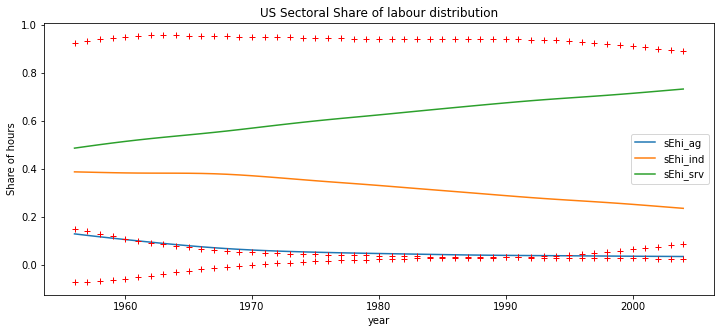

In [832]:
US[['sEhi_ag','sEhi_ind', 'sEhi_srv']].plot(figsize = (12, 5), title = 'US Sectoral Share of labour distribution')
plt.plot(US['L_a_calc'], 'r+', label = 'Ag. Model')
plt.plot(US['L_m_calc'], 'r+', label = 'Ind. Model')
plt.plot(US['L_s_calc'], 'r+', label = 'Srv. Model')
plt.ylabel("Share of hours")


plt.show()

In [833]:
def func_2(X, a_bar, s_bar):
          A_a, A_m, A_s = X 
          L_a = (((1 - a) * (a_bar/A_a)) + (a * ( L + (s_bar / A_s)))) 
          return L_a

In [834]:
parameters_1, covariance = curve_fit(func, (A_a, A_m, A_s), L_a, bounds=(0, [1, 1]))

parameters_1

array([0.13096801, 1.        ])

In [835]:
US

,country,sEhi_ag,sEhi_ind,sEhi_srv,yEhi_ag,yEhi_ind,yEhi_srv,YLh,RelYLh,agri_prod,ind_prod,srv_prod,agri_prod_norm,ind_prod_norm,srv_prod_norm,agg_prod,agg_prod_growth,agri_TFP,ind_TFP,srv_TFP,L_a_calc,L_m_calc,L_s_calc
year,,,,,,,,,,,,,,,,,,,,,,,
1956,US,0.13,0.39,0.49,2.50,13.33,23.05,16.67,1.00,19.52,34.47,47.48,1.00,1.00,1.00,1.00,0.02,NaN,NaN,NaN,0.15,0.93,-0.07
1957,US,0.12,0.39,0.49,2.61,13.69,23.29,17.07,1.00,21.49,35.51,47.24,1.10,1.03,1.00,1.02,0.02,1.10,1.03,1.00,0.14,0.93,-0.07
1958,US,0.12,0.38,0.50,2.74,14.07,23.55,17.50,1.00,23.68,36.62,47.07,1.21,1.06,0.99,1.04,0.02,1.21,1.06,0.99,0.13,0.94,-0.07
1959,US,0.11,0.38,0.51,2.87,14.48,23.83,17.94,1.00,26.13,37.79,46.99,1.34,1.10,0.99,1.07,0.02,1.34,1.10,0.99,0.12,0.95,-0.06
1960,US,0.10,0.38,0.51,3.01,14.91,24.14,18.41,1.00,28.88,39.00,47.01,1.48,1.13,0.99,1.10,0.02,1.48,1.13,0.99,0.11,0.95,-0.06
1961,US,0.10,0.38,0.52,3.16,15.36,24.49,18.90,1.00,31.99,40.25,47.13,1.64,1.17,0.99,1.12,0.03,1.64,1.17,0.99,0.10,0.95,-0.05
1962,US,0.09,0.38,0.53,3.31,15.83,24.88,19.42,1.00,35.51,41.52,47.35,1.82,1.20,1.00,1.15,0.03,1.82,1.20,1.00,0.09,0.96,-0.05
1963,US,0.09,0.38,0.53,3.48,16.32,25.29,19.95,1.00,39.49,42.80,47.65,2.02,1.24,1.00,1.18,0.03,2.02,1.24,1.00,0.08,0.96,-0.04
1964,US,0.08,0.38,0.54,3.65,16.80,25.72,20.49,1.00,43.96,44.09,48.00,2.25,1.28,1.01,1.22,0.03,2.25,1.28,1.01,0.08,0.96,-0.03


In [836]:
L_a = US['sEhi_ag']
L_m = US['sEhi_ind']
L_s = US['sEhi_srv']
agg_prod_growth = US['agg_prod_growth']

def func_mult(X, a_bar, s_bar, b, rho):
          
          A_a, A_m, A_s = X 

          L_a = (((1 - a) * (a_bar/A_a)) + (a * ( L + (s_bar / A_s)))) 
          x = (b/(1-b))**(1/(rho-1)) * (A_m/A_s)**(rho/(rho-1))
          L_m = ((L - L_a) + (s_bar/ A_s))/ (1+x)
          L_s = L - L_a - L_m

          agg_prod = (L_a * A_a) + (L_m * A_m ) + (L_s * A_s) 

          agg_prod_arr.append(agg_prod)
          
          # agg_prod_growth = []
          # agg_prod_growth[0] = 0.02

          # for i in range(1, len(agg_prod)-1):
          # agg_prod_growth[i] = ((agg_prod[i+1] - agg_prod[i])/ agg_prod[i])
          if len(agg_prod_arr) == 1:
                    agg_prod_growth = 0.02

          else:
                    agg_prod_growth = (agg_prod - agg_prod_arr[0][-1])/ (agg_prod - agg_prod_arr[0][-1])

          return L_a, L_m, L_s, agg_prod_growth

In [837]:
parameters_mult, covariance_mult = curve_fit(func_mult, (A_a, A_m, A_s), (L_a, L_m, L_s,agg_prod_growth), bounds=(0, 0, 0, -np.inf, [1, 1, 1, 1]))

parameters_mult

ValueError: too many values to unpack (expected 2)

In [ ]:
from scipy.optimize import leastsq

def func(x):
          return 2*(x-3)**2+1

leastsq(func, 0)

(array([2.99999999]), 1)

In [ ]:
from scipy.optimize import leastsq

# leastsq(func_mult, (A_a, A_m, A_s), (L_a, L_m, L_s,agg_prod_growth), bounds=(0, 0, 0, -np.inf, [1, 1, 1, 1]))
leastsq(func_mult, (A_a, A_m, A_s), (L_a, L_m, L_s,agg_prod_growth))

ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

In [ ]:
from lmfit import Parameters, minimize, report_fit



In [ ]:
def func_1(X, b, rho):
          A_a, A_m, A_s= X 
          # s_bar = 0.89

          L_a = func((A_a, A_m, A_s), a_bar=parameters1[0], s_bar=parameters1[1])

          s_bar = parameters1[1]
          x = (b/(1-b))**(1/(rho-1)) * (A_m/A_s)**(rho/(rho-1))
          L_m = ((L - L_a) + (s_bar/ A_s))/ (1+x)
          #print(L_a)

          return L_m

In [ ]:
from scipy.optimize import minimize

def eq( p ):
    s1,s2,s3 = p 
    f1 = 1.1**3 / s1*1.1**1+s2*1.1**2+s3*1.1**3
    f2 = 0.9**1 / s1*0.9**1+s2*0.9**2+s3*0.9**3
    return (f1, f2) 

bnds = ( (0, None), (0, None), (0, None) )
cons = ( { 'type' : 'ineq', 'fun': lambda p: p[0]+p[1]+p[2] - 1} )


minimize( eq, (0.3,0.3,0.3),  bounds=bnds, constraints=cons )

ValueError: Objective function must return a scalar

In [ ]:
def func_3(X, b, rho):
          A_a, A_m, A_s = X 
          # a_bar = parameters_1[0]
          s_bar = parameters_1[1]
          x = (b/(1-b))**(1/(rho-1)) * (A_m/A_s)**(rho/(rho-1))
          L_m = ((L - L_a) + (s_bar/ A_s))/ (1+x)

          return L_m

In [ ]:
def func_4(X, a_bar, s_bar, b, rho):
          A_a, A_m, A_s = X 
          
          L_a = (((1 - a) * (a_bar/A_a)) + (a * ( L + (s_bar / A_s)))) 
          x = (b/(1-b))**(1/(rho-1)) * (A_m/A_s)**(rho/(rho-1))
          L_m = ((L - L_a) + (s_bar/ A_s))/ (1+x)

          return L_a, L_m

In [ ]:
L_m = US['sEhi_ind']

parameters, covariance = curve_fit(func_3, (A_a, A_m, A_s), L_m, bounds=([0, -np.inf], [1, +np.inf]))

parameters

/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_1521/1272476353.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  x = (b/(1-b))**(1/(rho-1)) * (A_m/A_s)**(rho/(rho-1))
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_1521/1272476353.py:5: RuntimeWarning: overflow encountered in power
  x = (b/(1-b))**(1/(rho-1)) * (A_m/A_s)**(rho/(rho-1))


array([0.50000001, 1.        ])

/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_1521/4288100482.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  x = (b/(1-b))**(1/(rho-1)) * (A_m/A_s)**(rho/(rho-1))


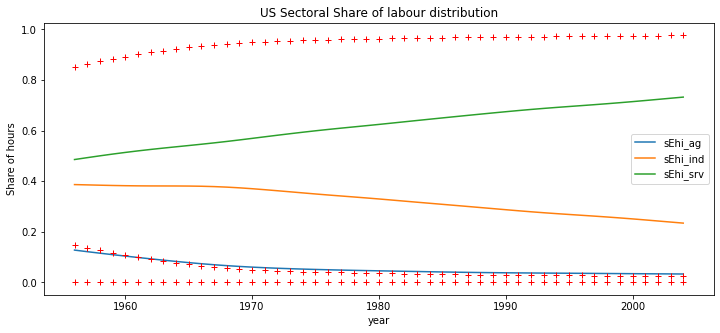

In [ ]:
#a_bar = parameters[0]
# s_bar = parameters[1]
b = parameters[0]
rho = parameters[1]


US['L_a_calc'] = (((1 - a) * (a_bar/ US['agri_prod_norm'])) + (a * ( L + (s_bar /US['srv_prod_norm'])))) 

x = (b/(1-b))**(1/(rho-1)) * (A_m/A_s)**(rho/(rho-1))
US['L_m_calc'] = ((L - US['L_a_calc']) + (s_bar/ US['srv_prod_norm']))/ (1+x)

US['L_s_calc'] = 1 - US['L_a_calc'] - US['L_m_calc']

US[['sEhi_ag','sEhi_ind', 'sEhi_srv']].plot(figsize = (12, 5), title = 'US Sectoral Share of labour distribution')
plt.plot(US['L_a_calc'], 'r+', label = 'Ag. Model')
plt.plot(US['L_m_calc'], 'r+', label = 'Ind. Model')
plt.plot(US['L_s_calc'], 'r+', label = 'Srv. Model')
plt.ylabel("Share of hours")

plt.show()

In [ ]:
duarte.country.unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Denmark',
       'Spain', 'Finland', 'France', 'United Kingdom', 'Greece',
       'Ireland', 'Italy', 'Japan', 'Korea', 'Mexico', 'Netherlands',
       'Norway', 'New Zealand', 'Portugal', 'Sweden', 'Turkey',
       'Venezuela', 'US'], dtype=object)

<AxesSubplot:title={'center':'Brazil Sectoral Share of labour distribution'}, xlabel='year'>

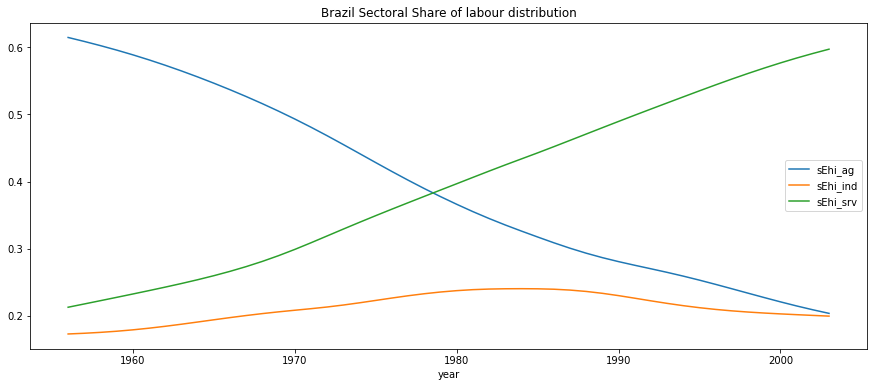

In [ ]:
duarte_brazil = duarte.loc[duarte['country'] == 'Brazil']
duarte_brazil = duarte_brazil.loc[(duarte_brazil['year'] >= 1956) & (duarte_brazil['year'] <=2004)] 
duarte_brazil = duarte_brazil.set_index('year')
duarte_brazil[['sEhi_ag','sEhi_ind', 'sEhi_srv']].plot(figsize = (15, 6), title = 'Brazil Sectoral Share of labour distribution')

In [ ]:
# Calibration 

1. Normalize productivity levels to one in 1956
2. growth rate of sectoral value added per hour in the US to obtain the time paths of sectoral labour productivity 
3. $\gamma_{i, t}$ the gorwht rate of labour productivity in sector i at date t 

$$
A_{i, t+1} = (1 + \gamma_{i, t}) A_{i, t}
$$

Values of a, $\overline{a}$, $\overline{s}$, b, $\rho$

given values of $\rho$ and b, remaining other are calculated to match shares of hours in agriculture and manufcaturing in US using equation 7 and 8.

equation 7

from First order conditions for consumption imply that the labour input in agriculture is given by 

$$
L_a = (1 - a) \frac{\overline{a}}{A_a} + a(L + \frac{\overline{s}}{A_s})
$$

equation 8 

$$
L_m  = \frac{(L - L_a) + \overline{s} / A_s} {1 + x} 
$$

where 
$$
x = \frac{b}{1-b}^{1/(\rho -1)} \frac{A_m}{A_s}^{\rho / (\rho-1)}
$$

b and $\rho$ are jointly chosen to match as close as possible the shares of hours in manufacturing over time and the annualized growth rate of aggregate productivity. 

annualized growth rate of productivity in US between 1956 and 2004 is roughly 2% 


In [ ]:
# 4 equations and 4 unknowns  

# Fitting initial values 

from sympy.core.symbol import symbols
from sympy.solvers.solveset import nonlinsolve

# data for 1956 


# given 


# from calculation in paper for 1956 - formula is given in paper - follow difference procedure for India comparing US
a = 0.01 # long run assumption - just check this 

A_a = US['agri_prod_norm'][1956]
A_m = US['ind_prod_norm'][1956]
A_s = US['srv_prod_norm'][1956]

L_a = US['sEhi_ag'][1956]
L_m = US['sEhi_ind'][1956]
L_s = US['sEhi_srv'][1956]
L = L_a + L_m + L_s

a_bar, s_bar, b, rho = symbols('a_bar, s_bar, b, rho', real=True)

# equal to zero below 
nonlinsolve([ 
          L_a - (((1 - a) * (a_bar/A_a)) + (a * (L + (s_bar / A_s)))), 
          L_m - ((L - L_a) + (s_bar/ A_s))/ (1+((b/(1-b))**(1/(rho-1)) * (A_m/A_s)**(rho/(rho-1)))),
          L_a - L_m - L_s - L, 
          (L_m/L_s) - (b/(1-b))**(1/(rho-1)) * (A_m/A_s)**(rho/(rho-1)),
          ],  
          [a_bar, s_bar, b, rho])


{(-0.00390510700199707*1.0**(rho/(rho - 1))*(b/(1 - b))**(1/(rho - 1)) + 0.123905319931767, 0.38660559319771*1.0**(rho/(rho - 1))*(b/(1 - b))**(1/(rho - 1)) - 0.485583979868525, b, rho), (-0.00390510700199707*1.0**(rho/(rho - 1))*(-b/(b - 1))**(1/(rho - 1)) + 0.123905319931767, 0.38660559319771*1.0**(rho/(rho - 1))*(-b/(b - 1))**(1/(rho - 1)) - 0.485583979868525, b, rho)}

In [ ]:
US

,country,sEhi_ag,sEhi_ind,sEhi_srv,yEhi_ag,yEhi_ind,yEhi_srv,YLh,RelYLh,agri_prod,ind_prod,srv_prod,agri_prod_norm,ind_prod_norm,srv_prod_norm,agg_prod,agg_prod_growth,agri_TFP,ind_TFP,srv_TFP,L_a_calc,L_m_calc,L_s_calc
year,,,,,,,,,,,,,,,,,,,,,,,
1956,US,0.13,0.39,0.49,2.50,13.33,23.05,16.67,1.00,19.52,34.47,47.48,1.00,1.00,1.00,1.00,0.02,NaN,NaN,NaN,0.15,0.00,0.85
1957,US,0.12,0.39,0.49,2.61,13.69,23.29,17.07,1.00,21.49,35.51,47.24,1.10,1.03,1.00,1.02,0.02,1.10,1.03,1.00,0.14,0.00,0.86
1958,US,0.12,0.38,0.50,2.74,14.07,23.55,17.50,1.00,23.68,36.62,47.07,1.21,1.06,0.99,1.04,0.02,1.21,1.06,0.99,0.13,0.00,0.87
1959,US,0.11,0.38,0.51,2.87,14.48,23.83,17.94,1.00,26.13,37.79,46.99,1.34,1.10,0.99,1.07,0.02,1.34,1.10,0.99,0.12,0.00,0.88
1960,US,0.10,0.38,0.51,3.01,14.91,24.14,18.41,1.00,28.88,39.00,47.01,1.48,1.13,0.99,1.10,0.02,1.48,1.13,0.99,0.11,0.00,0.89
1961,US,0.10,0.38,0.52,3.16,15.36,24.49,18.90,1.00,31.99,40.25,47.13,1.64,1.17,0.99,1.12,0.03,1.64,1.17,0.99,0.10,0.00,0.90
1962,US,0.09,0.38,0.53,3.31,15.83,24.88,19.42,1.00,35.51,41.52,47.35,1.82,1.20,1.00,1.15,0.03,1.82,1.20,1.00,0.09,0.00,0.91
1963,US,0.09,0.38,0.53,3.48,16.32,25.29,19.95,1.00,39.49,42.80,47.65,2.02,1.24,1.00,1.18,0.03,2.02,1.24,1.00,0.08,0.00,0.92
1964,US,0.08,0.38,0.54,3.65,16.80,25.72,20.49,1.00,43.96,44.09,48.00,2.25,1.28,1.01,1.22,0.03,2.25,1.28,1.01,0.08,0.00,0.92
